In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
from scipy.stats import stats
from sklearn.model_selection import train_test_split
%matplotlib inline
from IPython.display import Image
style.use('ggplot')

In [53]:
df=pd.read_csv('C:/Users/Latika Bisht/Downloads/Bank_loan.csv')
df

,Loan_ID,Gender,Date,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,01-01-2010,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,02-02-2010,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,03-03-2010,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,01-01-2010,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,02-02-2010,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,03-03-2010,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,01-01-2010,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,02-02-2010,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,03-03-2010,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,01-01-2010,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Date                 614 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(9)
memory usage: 67.2+ KB


In [55]:
df.dtypes

Loan_ID               object
Gender                object
Date                  object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [56]:
test=pd.read_csv('C:/Users/Latika Bisht/Documents/Bankloan_Test.csv')
test.shape

(194, 13)

In [57]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [58]:
df.isnull().sum()

Loan_ID               0
Gender               13
Date                  0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [59]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

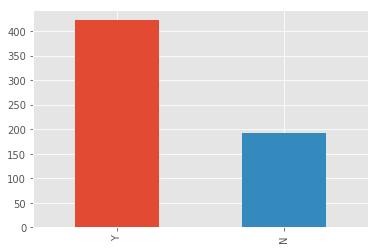

In [60]:
df['Loan_Status'].value_counts().plot.bar()
#The loan of 422(around 69%) people out of 614 was approved.

In [61]:
pd.crosstab(df['Credit_History'],df['Loan_Status'],margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


In [63]:
pd.crosstab(df['Credit_History'],df['Loan_Status']).apply(lambda r: r/r.sum(),axis=1)
#79.58% of the applicants whose loan got approved have credit history 1.

Loan_Status,N,Y
Credit_History,,
0.0,0.921348,0.078652
1.0,0.204211,0.795789


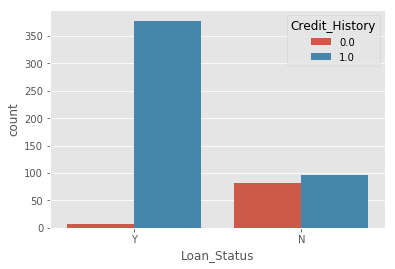

In [68]:
sns.countplot(x='Loan_Status', data=df, hue='Credit_History')

In [64]:
pd.crosstab(df['Credit_History'],df['Gender']).apply(lambda r: r/r.sum(),axis=1)
#81% are male whose credit history is 1.

Gender,Female,Male
Credit_History,,
0.0,0.197674,0.802326
1.0,0.180258,0.819742


In [81]:
df.Gender.value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

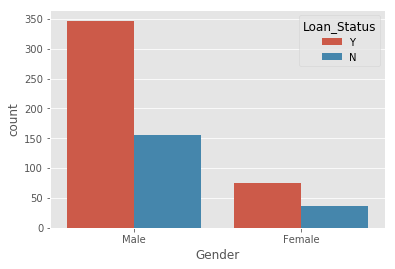

In [82]:
sns.countplot(x = 'Gender',hue ='Loan_Status',data = df)

Is there a correlation between LoanAmount and Self_Emplyed?


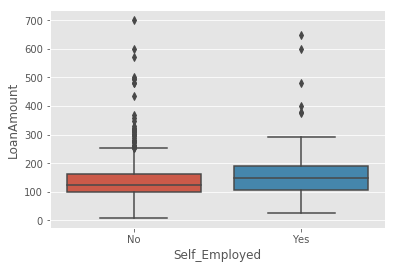

In [71]:
sns.boxplot(x='Self_Employed', y='LoanAmount', data=df)
#This shows that self employed people have applied for a higher loan amount than non self-employed people

In [65]:
df['Gender'].fillna("Male",inplace=True)
print(df['Gender'].mode())
print(df['Gender'].unique())
test['Gender'].fillna("Male",inplace=True)
print(test['Gender'].mode())
print(test['Gender'].unique())

0    Male
dtype: object
['Male' 'Female']
0    Male
dtype: object
['Male' 'Female']


In [66]:
df['Dependents'].fillna("0",inplace=True)
print(df['Dependents'].mode())
print(df['Dependents'].unique())
test['Dependents'].fillna("0",inplace=True)
print(test['Dependents'].mode())
print(test['Dependents'].unique())

0    0
dtype: object
['0' '1' '2' '3+']
0    0
dtype: object
['0' '1' '2' '3+']


In [10]:
df['Dependents'].replace(['3+'] , [3] , inplace = True)
test['Dependents'].replace(['3+'] , [3] , inplace = True)

In [11]:
df['Married'].fillna("Yes",inplace=True)
print(df['Married'].mode())
print(df['Married'].unique())
test['Married'].fillna("Yes",inplace=True)
print(test['Married'].mode())
print(test['Married'].unique())

0    Yes
dtype: object
['No' 'Yes']
0    Yes
dtype: object
['Yes' 'No']


In [12]:
df['LoanAmount'].fillna('120',inplace=True)
print(df['LoanAmount'].mode())
test['LoanAmount'].fillna('120',inplace=True)
print(test['LoanAmount'].mode())

0    120
dtype: object
0    110
dtype: object


In [13]:
test['Loan_Amount_Term'].fillna('360',inplace=True)
print(test['Loan_Amount_Term'].mode())
df['Loan_Amount_Term'].fillna('360',inplace=True)
print(df['Loan_Amount_Term'].mode())

0    360
dtype: object
0    360
dtype: object


In [14]:
df['Credit_History'].fillna('1',inplace=True)
print(df['Credit_History'].mode())
test['Credit_History'].fillna('1',inplace=True)
print(test['Credit_History'].mode())

0    1
dtype: object
0    1
dtype: object


In [17]:
df['Self_Employed'].fillna('No',inplace=True)
print(df['Self_Employed'].mode())
test['Self_Employed'].fillna('No',inplace=True)
print(test['Self_Employed'].mode())

0    No
dtype: object
0    No
dtype: object


In [18]:
df.isnull().any()

Loan_ID              False
Gender               False
Date                 False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

In [19]:
test['Self_Employed'].replace(['Yes' , 'No'] , [0 , 1] , inplace = True)
df['Self_Employed'].replace(['Yes' , 'No'] , [0 , 1] , inplace = True)

In [20]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df.dtypes

Loan_ID               object
Gender                 int64
Date                  object
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount            object
Loan_Amount_Term      object
Credit_History        object
Property_Area          int64
Loan_Status            int64
dtype: object

In [21]:
var_mod = ['Gender','Married','Dependents','Education',
           'Property_Area']
le = LabelEncoder()
for i in var_mod:
    test[i] = le.fit_transform(test[i])
print(test.dtypes)

Loan_ID               object
Gender                 int64
Date                  object
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount            object
Loan_Amount_Term      object
Credit_History        object
Property_Area          int64
dtype: object


In [22]:
df.isnull().sum()

Loan_ID              0
Gender               0
Date                 0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [23]:
df.Credit_History.value_counts()

1.0    475
0.0     89
1       50
Name: Credit_History, dtype: int64

In [24]:
df['Date']= pd.to_datetime(df.Date)
df.dtypes

Loan_ID                      object
Gender                        int64
Date                 datetime64[ns]
Married                       int64
Dependents                    int64
Education                     int64
Self_Employed                 int64
ApplicantIncome               int64
CoapplicantIncome           float64
LoanAmount                   object
Loan_Amount_Term             object
Credit_History               object
Property_Area                 int64
Loan_Status                   int64
dtype: object

In [25]:
df.dtypes

Loan_ID                      object
Gender                        int64
Date                 datetime64[ns]
Married                       int64
Dependents                    int64
Education                     int64
Self_Employed                 int64
ApplicantIncome               int64
CoapplicantIncome           float64
LoanAmount                   object
Loan_Amount_Term             object
Credit_History               object
Property_Area                 int64
Loan_Status                   int64
dtype: object

In [28]:
df['LoanAmount'] = df.LoanAmount.astype(int)
df['Loan_Amount_Term'] = df.Loan_Amount_Term.astype(int)
df['Credit_History'] = df.Credit_History.astype(int)

In [29]:
test['LoanAmount'] = test.LoanAmount.astype(int)
test['Loan_Amount_Term'] = test.Loan_Amount_Term.astype(int)
test['Credit_History'] = test.Credit_History.astype(int)

In [31]:
df1 =df.drop(['Loan_ID','Date' ] , axis = 1)
test1 =test.drop(['Loan_ID','Date' ] , axis = 1)
B = df1['Loan_Status']

In [40]:
from sklearn import preprocessing,model_selection
x=['Gender','Married','Education','Self_Employed','Property_Area','LoanAmount','Loan_Amount_Term','Credit_History','Dependents']
y=['Loan_Status']
#print(df[x])
X_train,X_test,y_train,y_test=model_selection.train_test_split(df[x],df[y],test_size=0.2)
#X_train,X_test,y_train,y_test=model_selection.train_test_split(df[x],df[y],test_size=0.3)

In [41]:
from sklearn import ensemble
clf=ensemble.RandomForestClassifier(n_estimators=100, criterion='gini',max_depth=3,max_features='auto')
#clf=ensemble.RandomForestClassifier(n_estimators=200,max_features=3,min_samples_split=5,oob_score=True,n_jobs=-1,criterion='entropy')
clf.fit(X_train,y_train)
accuracy=clf.score(X_test,y_test)
print(accuracy)

C:\Users\Latika Bisht\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.8373983739837398
